# Sales Performance Analysis  
## Task 2 – Alfido Tech Internship


### Objective  
The objective of this project is to analyze sales performance using the Superstore dataset to identify trends, regional performance, and category-level contributions.


## Step 1: Data Loading & Initial Exploration


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

In [ ]:
# Load Dataset
ss_sales = pd.read_csv("superstore_final_dataset.csv", encoding="latin1")


In [ ]:
# Preview Data
ss_sales.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [ ]:
# Dataset Shape
ss_sales.shape

(9800, 18)

In [ ]:
# Column Name
ss_sales.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [ ]:
# Dataset Information
ss_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# Missing Values Check
ss_sales.isna().sum()

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


## Step 2: Data Cleaning & Feature Engineering



In [ ]:
# Check Duplicate Record
ss_sales.duplicated().sum()

np.int64(0)

In [ ]:
# Remove Duplicates
ss_sales.drop_duplicates(inplace = True)

In [ ]:
# Remove Postal Code column no need
ss_sales.drop(columns= 'Postal_Code', inplace = True)

In [ ]:
 #  Convert date Columns To Datetime

ss_sales['Order_Date'] = pd.to_datetime(ss_sales['Order_Date'], dayfirst= True)
ss_sales['Ship_Date'] = pd.to_datetime(ss_sales['Ship_Date'], dayfirst = True)

In [ ]:
# Varify Date Convertion
ss_sales[['Order_Date', 'Ship_Date']].dtypes

,0
Order_Date,datetime64[ns]
Ship_Date,datetime64[ns]


In [ ]:
# Create Time-Based Feature
ss_sales['Year'] = ss_sales['Order_Date'].dt.year
ss_sales['Month'] = ss_sales['Order_Date'].dt.month
ss_sales['Month_Name'] = ss_sales['Order_Date'].dt.month_name()
ss_sales['Year_Month'] = ss_sales['Order_Date'].dt.to_period('M').astype(str)

In [ ]:
# Missing Values Recheck
ss_sales.isna().sum()

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


In [ ]:
# Final Dataset Check After Cleaning

ss_sales.info()
ss_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Region         9800 non-null   object        
 12  Product_ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub_Category   9800 non-null   object        
 15  Product_Name   9800 n

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Year,Month,Month_Name,Year_Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,November,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,November,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,June,2017-06
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,October,2016-10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2016,10,October,2016-10


## Step 3: Sales KPIs & Performance Metrics


In [ ]:
# KPI 1: Total Sales(Revenue)

total_sales = ss_sales['Sales'].sum()
total_sales

np.float64(2261536.7827000003)

In [ ]:
# KPI 2: Total Number Of Order

total_orders = ss_sales['Order_ID'].nunique()
total_orders

4922

In [ ]:
# KPI 3: Average Sales Per Orders
avg_sales_per_order = total_sales / total_orders
avg_sales_per_order

np.float64(459.4751691791955)

In [ ]:
# KPI 4: Sales Performance By Region
sales_by_region = ( ss_sales.groupby('Region')['Sales']
                    .sum()
                    .sort_values(ascending = False)
)
sales_by_region

,Sales
Region,
West,710219.6845
East,669518.7260
Central,492646.9132
South,389151.4590


## Step 4: Sales Trends & Seasonality Analysis


In [ ]:
# Monthly Sales Trend (Year–Month)
monthly_sales = (
    ss_sales.groupby('Year_Month')['Sales']
      .sum()
      .reset_index()
)
monthly_sales.head()


,Year_Month,Sales
0,2015-01,14205.707
1,2015-02,4519.892
2,2015-03,55205.797
3,2015-04,27906.855
4,2015-05,23644.303


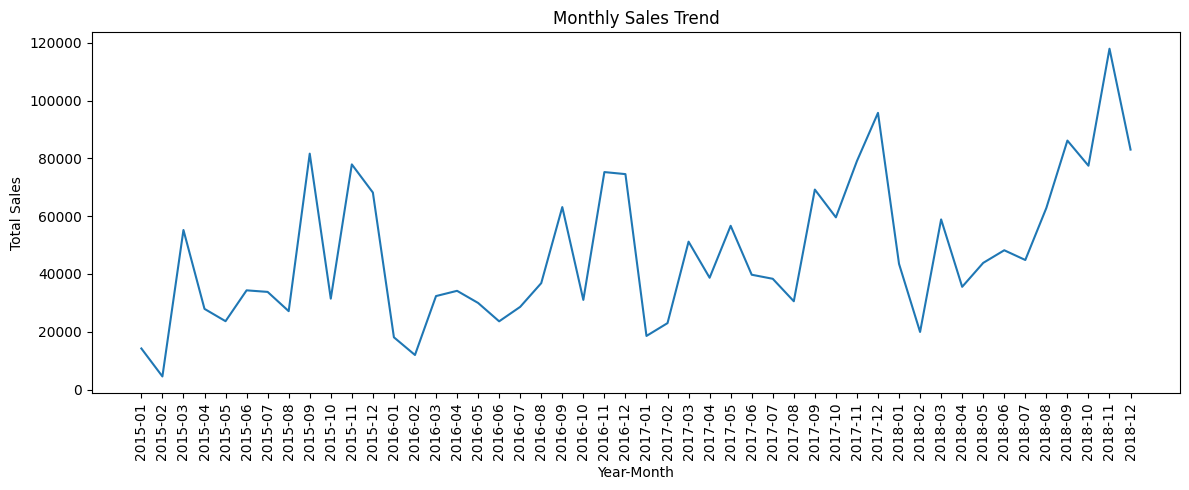

In [ ]:
# Line Chart: Monthly Sales Trend(Year–Month)

plt.figure(figsize=(12, 5))
plt.plot(monthly_sales['Year_Month'], monthly_sales['Sales'])
plt.xticks(rotation=90)
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [ ]:
# Year Wise Sales
yearly_sales = (
    ss_sales.groupby('Year')['Sales']
    .sum()
    .reset_index()
)
yearly_sales

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


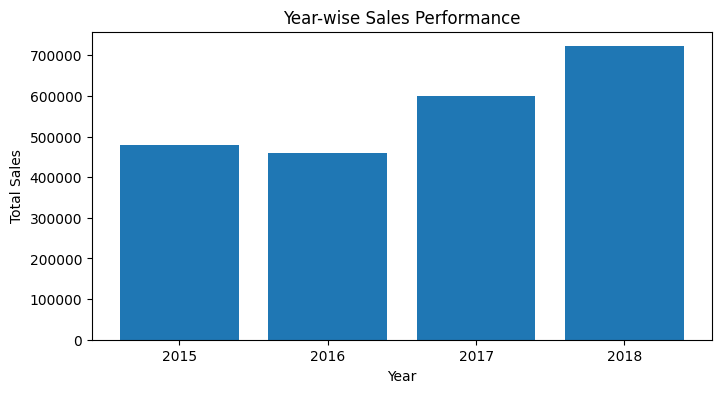

In [ ]:
# Bar Chart: Year-wise Sales
plt.figure(figsize=(8, 4))
plt.bar(yearly_sales['Year'].astype(str), yearly_sales['Sales'])
plt.title("Year-wise Sales Performance")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


In [ ]:
# Month-wise Seasonality (Across All Years)
monthly_seasonality = (
    ss_sales.groupby('Month')['Sales']
      .mean()
      .reset_index()
)
monthly_seasonality


,Month,Sales
0,1,257.627403
1,2,199.902745
2,3,290.549393
3,4,207.432269
4,5,212.533412
5,6,211.052856
6,7,208.802997
7,8,227.007110
8,9,221.642106
9,10,246.596162


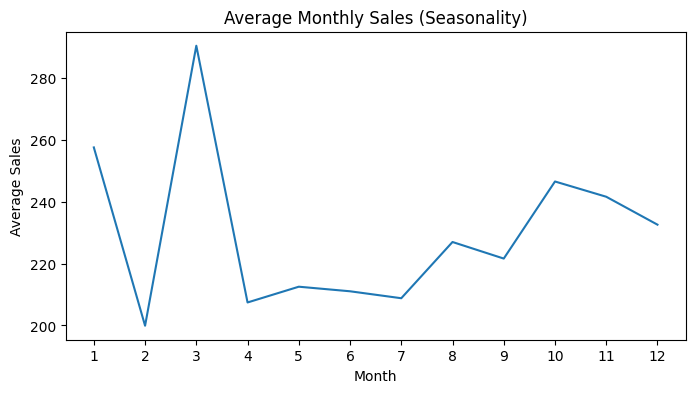

In [ ]:
# Line Chart: Average Sales by Month
plt.figure(figsize=(8, 4))
plt.plot(monthly_seasonality['Month'], monthly_seasonality['Sales'])
plt.title("Average Monthly Sales (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1, 13))
plt.show()


## Step 5: Category, Sub-Category & Product-Level Sales Analysis


In [ ]:
# Sales by Category

sales_by_category = (
    ss_sales.groupby('Category')['Sales']
    .sum()
    .sort_values(ascending = False)
    .reset_index()
)
sales_by_category

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


In [ ]:
# Sales by Sub-Category
sales_by_subcategory = (
    ss_sales.groupby('Sub_Category')['Sales']
    .sum()
    .sort_values(ascending = False)
    .reset_index()
)
sales_by_subcategory

,Sub_Category,Sales
0,Phones,327782.4480
1,Chairs,322822.7310
2,Storage,219343.3920
3,Tables,202810.6280
4,Binders,200028.7850
5,Machines,189238.6310
6,Accessories,164186.7000
7,Copiers,146248.0940
8,Bookcases,113813.1987
9,Appliances,104618.4030


In [ ]:
# Top 10 Products By Sales
top_10_products = (
    ss_sales.groupby('Product_Name')['Sales']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .reset_index()
)

top_10_products

,Product_Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


In [ ]:
# Bottom 10 Products by Sales
bottom_10_products = (
    ss_sales.groupby('Product_Name')['Sales']
    .sum()
    .sort_values(ascending = True)
    .head(10)
    .reset_index()
)
bottom_10_products

,Product_Name,Sales
0,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624
1,Avery 5,5.760
2,Xerox 20,6.480
3,Grip Seal Envelopes,7.072
4,Acme Serrated Blade Letter Opener,7.632
5,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700
6,Avery Hi-Liter Comfort Grip Fluorescent Highli...,7.800
7,Xerox 1989,7.968
8,4009 Highlighters,8.040
9,Stockwell Gold Paper Clips,8.096
